In [1]:
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Load environment variables
_ = load_dotenv()

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration to suppress warnings
warnings.filterwarnings('ignore')

# Additional configurations for better control over visualizations (optional)
plt.style.use('ggplot')  # For ggplot-like style in plots
pd.options.display.max_columns = None  # Ensure all columns are visible when displaying DataFrames


## Loading the Dataset

In [2]:
# Define the path to the dataset
file_path = '/Users/aryasmc/My_USD/Year_2024/Summer_2024/Capstone_Project/Capstone_Project/Cleaned_Data/cleaned_crypto_data_2.csv'

# Load the dataset
df = pd.read_csv(file_path)

In [3]:
df.head()

Unnamed: 0 product_id        time        low        high        open  \
0           0    ADA-USD  2021-07-20     1.0250     1.13650     1.12280   
1        4233    ETH-USD  2021-07-20  1718.4100  1840.79000  1818.45000   
2        5309   LINK-USD  2021-07-20    13.3849    14.78253    14.53026   
3        6387    LTC-USD  2021-07-20   103.8800   115.06000   113.20000   
4        7464  MATIC-USD  2021-07-20     0.6221     0.73860     0.73370   

       close        volume  price_change  average_price  volatility  \
0     1.0559  9.878371e+07      -0.06690       1.080750   10.878049   
1  1786.4600  2.789848e+05     -31.99000    1779.600000    7.121700   
2    13.7441  4.120032e+06      -0.78616      14.083715   10.441841   
3   107.3000  2.484134e+05      -5.90000     109.470000   10.762418   
4     0.6886  1.273039e+08      -0.04510       0.680350   18.726893   

   pct_change  day_of_week day_name  close_lag_1  volume_lag_1  close_lag_3  \
0         NaN            1  Tuesday          NaN           NaN          NaN   
1         NaN            1  Tuesday          NaN           NaN          NaN   
2         NaN            1  Tuesday          NaN           NaN          NaN   
3         NaN            1  Tuesday          NaN           NaN          NaN   
4         NaN            1  Tuesday          NaN           NaN          NaN   

   volume_lag_3  close_lag_7  volume_lag_7  close_MA10  close_ema_7  \
0           NaN          NaN           NaN         NaN       1.0559   
1           NaN          NaN           NaN         NaN    1786.4600   
2           NaN          NaN           NaN         NaN      13.7441   
3           NaN          NaN           NaN         NaN     107.3000   
4           NaN          NaN           NaN         NaN       0.6886   

   close_ema_14  close_ema_30  RSI  MACD  Signal_Line  volatility_7d  \
0        1.0559        1.0559  NaN   0.0          0.0            NaN   
1     1786.4600     1786.4600  NaN   0.0          0.0            NaN   
2       13.7441       13.7441  NaN   0.0          0.0            NaN   
3      107.3000      107.3000  NaN   0.0          0.0            NaN   
4        0.6886        0.6886  NaN   0.0          0.0            NaN   

   volatility_14d  volatility_30d  momentum_1d  momentum_7d  momentum_30d  \
0             NaN             NaN          NaN          NaN           NaN   
1             NaN             NaN          NaN          NaN           NaN   
2             NaN             NaN          NaN          NaN           NaN   
3             NaN             NaN          NaN          NaN           NaN   
4             NaN             NaN          NaN          NaN           NaN   

   month_of_year  
0              7  
1              7  
2              7  
3              7  
4              7

In [4]:
df.shape

(10696, 34)

In [5]:
# 'day_of_week' is incorrectly represented as starting from Tuesday (1)
# Correcting to start from Monday (0)
df['day_of_week'] = (df['day_of_week'] - 1) % 7

# Mapping corrected day names
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['day_name'] = df['day_of_week'].map(day_names)


In [6]:
# Display data types of columns
print(df.dtypes)


Unnamed: 0          int64
product_id         object
time               object
low               float64
high              float64
open              float64
close             float64
volume            float64
price_change      float64
average_price     float64
volatility        float64
pct_change        float64
day_of_week         int64
day_name           object
close_lag_1       float64
volume_lag_1      float64
close_lag_3       float64
volume_lag_3      float64
close_lag_7       float64
volume_lag_7      float64
close_MA10        float64
close_ema_7       float64
close_ema_14      float64
close_ema_30      float64
RSI               float64
MACD              float64
Signal_Line       float64
volatility_7d     float64
volatility_14d    float64
volatility_30d    float64
momentum_1d       float64
momentum_7d       float64
momentum_30d      float64
month_of_year       int64
dtype: object


In [7]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Check numeric columns for appropriate types
numeric_columns = ['low', 'high', 'open', 'close', 'volume', 'price_change', 'average_price', 
                   'volatility', 'pct_change', 'close_lag_1', 'volume_lag_1', 'close_lag_3', 
                   'volume_lag_3', 'close_lag_7', 'volume_lag_7', 'close_MA10', 'close_ema_7', 
                   'close_ema_14', 'close_ema_30', 'RSI', 'MACD', 'Signal_Line', 
                   'volatility_7d', 'volatility_14d', 'volatility_30d', 'momentum_1d', 
                   'momentum_7d', 'momentum_30d']

# Convert numeric columns to float if necessary
df[numeric_columns] = df[numeric_columns].astype(float)

# Ensure 'product_id' remains as object type
# If 'product_id' needs further adjustments, specify here

# Display updated dtypes to confirm changes
print(df.dtypes)


Unnamed: 0                 int64
product_id                object
time              datetime64[ns]
low                      float64
high                     float64
open                     float64
close                    float64
volume                   float64
price_change             float64
average_price            float64
volatility               float64
pct_change               float64
day_of_week                int64
day_name                  object
close_lag_1              float64
volume_lag_1             float64
close_lag_3              float64
volume_lag_3             float64
close_lag_7              float64
volume_lag_7             float64
close_MA10               float64
close_ema_7              float64
close_ema_14             float64
close_ema_30             float64
RSI                      float64
MACD                     float64
Signal_Line              float64
volatility_7d            float64
volatility_14d           float64
volatility_30d           float64
momentum_1

In [8]:
# Drop 'Unnamed: 0' column if it's not needed
df.drop(columns=['Unnamed: 0'], inplace=True)

# Confirm the column has been dropped
print(df.columns)


Index(['product_id', 'time', 'low', 'high', 'open', 'close', 'volume',
       'price_change', 'average_price', 'volatility', 'pct_change',
       'day_of_week', 'day_name', 'close_lag_1', 'volume_lag_1', 'close_lag_3',
       'volume_lag_3', 'close_lag_7', 'volume_lag_7', 'close_MA10',
       'close_ema_7', 'close_ema_14', 'close_ema_30', 'RSI', 'MACD',
       'Signal_Line', 'volatility_7d', 'volatility_14d', 'volatility_30d',
       'momentum_1d', 'momentum_7d', 'momentum_30d', 'month_of_year'],
      dtype='object')


In [9]:
# Calculate null counts and percentages for each column
null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

# Combine counts and percentages into a single DataFrame
null_summary = pd.DataFrame({
    'Counts': null_counts,
    'Percentages': null_percentages
})

# Sort by percentage of null values in descending order
null_summary_sorted = null_summary.sort_values(by='Percentages', ascending=False)

# Print columns with null values sorted by highest percentage
print("Columns with null values sorted by highest percentage:")
print(null_summary_sorted)

Columns with null values sorted by highest percentage:
                Counts  Percentages
momentum_30d       300     2.804787
volatility_30d     300     2.804787
volatility_14d     140     1.308901
RSI                130     1.215408
close_MA10          90     0.841436
momentum_7d         70     0.654450
volume_lag_7        70     0.654450
volatility_7d       70     0.654450
close_lag_7         70     0.654450
close_lag_3         30     0.280479
volume_lag_3        30     0.280479
close_lag_1         10     0.093493
volume_lag_1        10     0.093493
momentum_1d         10     0.093493
pct_change          10     0.093493
close_ema_7          0     0.000000
close_ema_30         0     0.000000
MACD                 0     0.000000
close_ema_14         0     0.000000
Signal_Line          0     0.000000
product_id           0     0.000000
time                 0     0.000000
day_name             0     0.000000
day_of_week          0     0.000000
volatility           0     0.000000
average_p

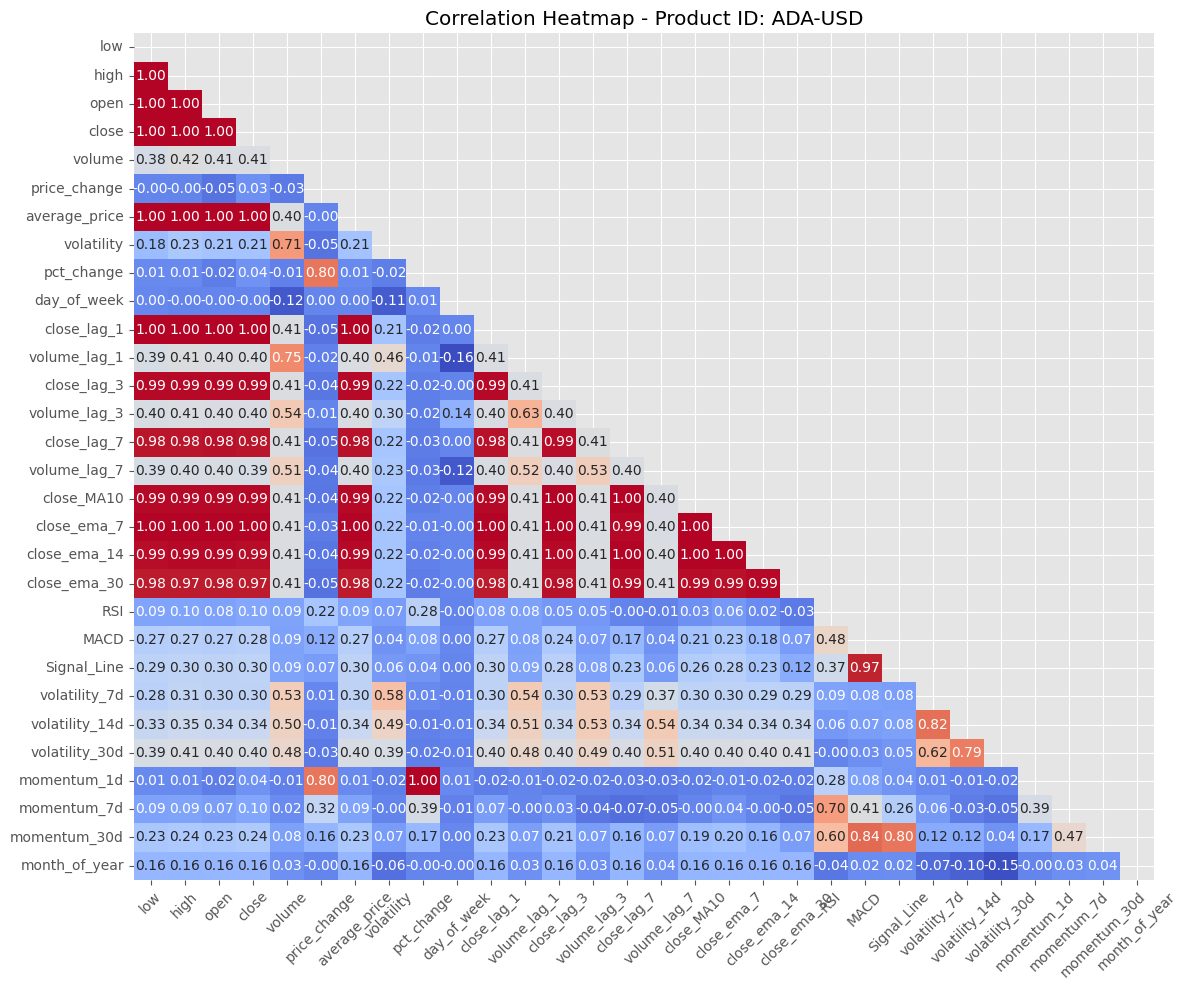

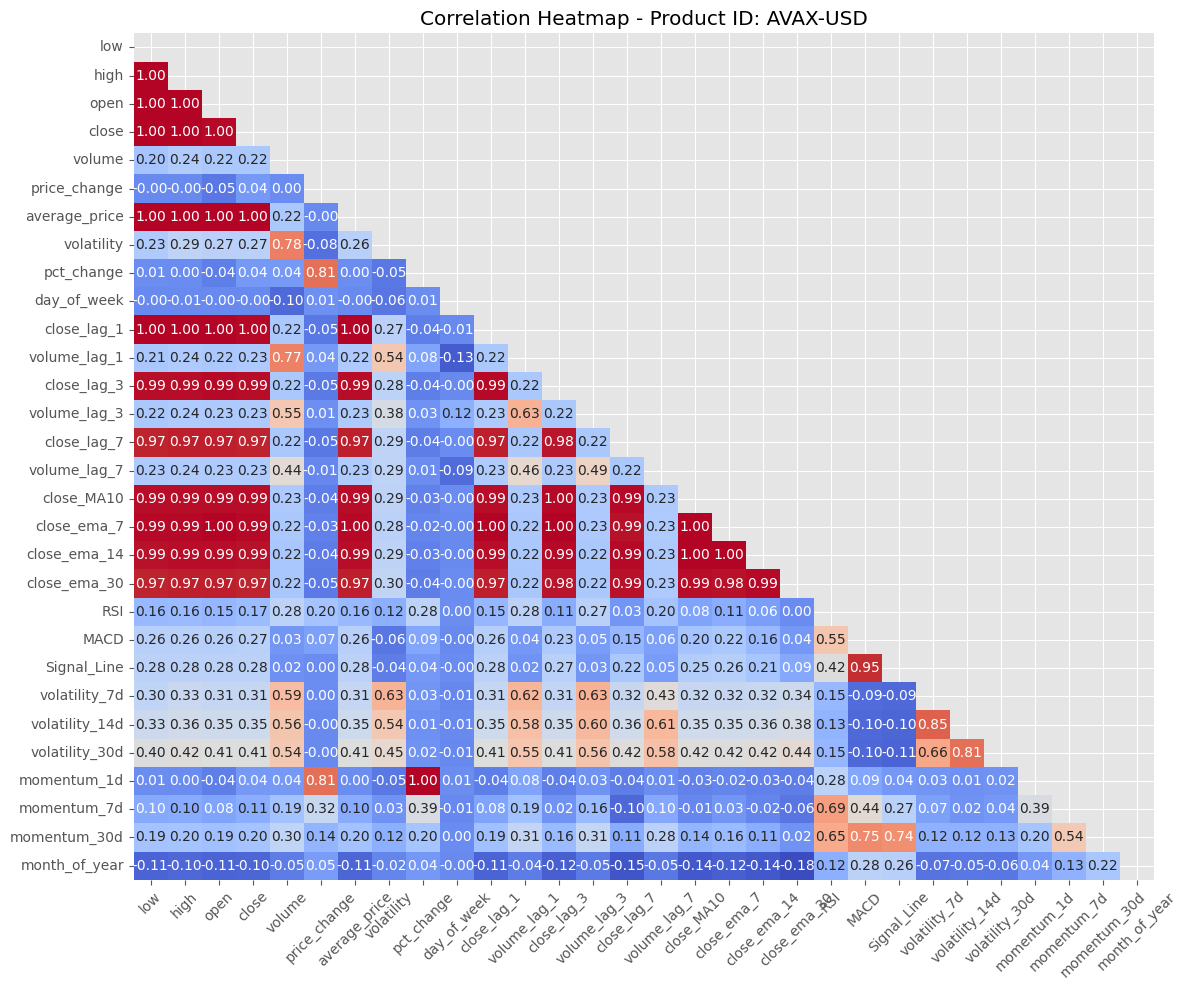

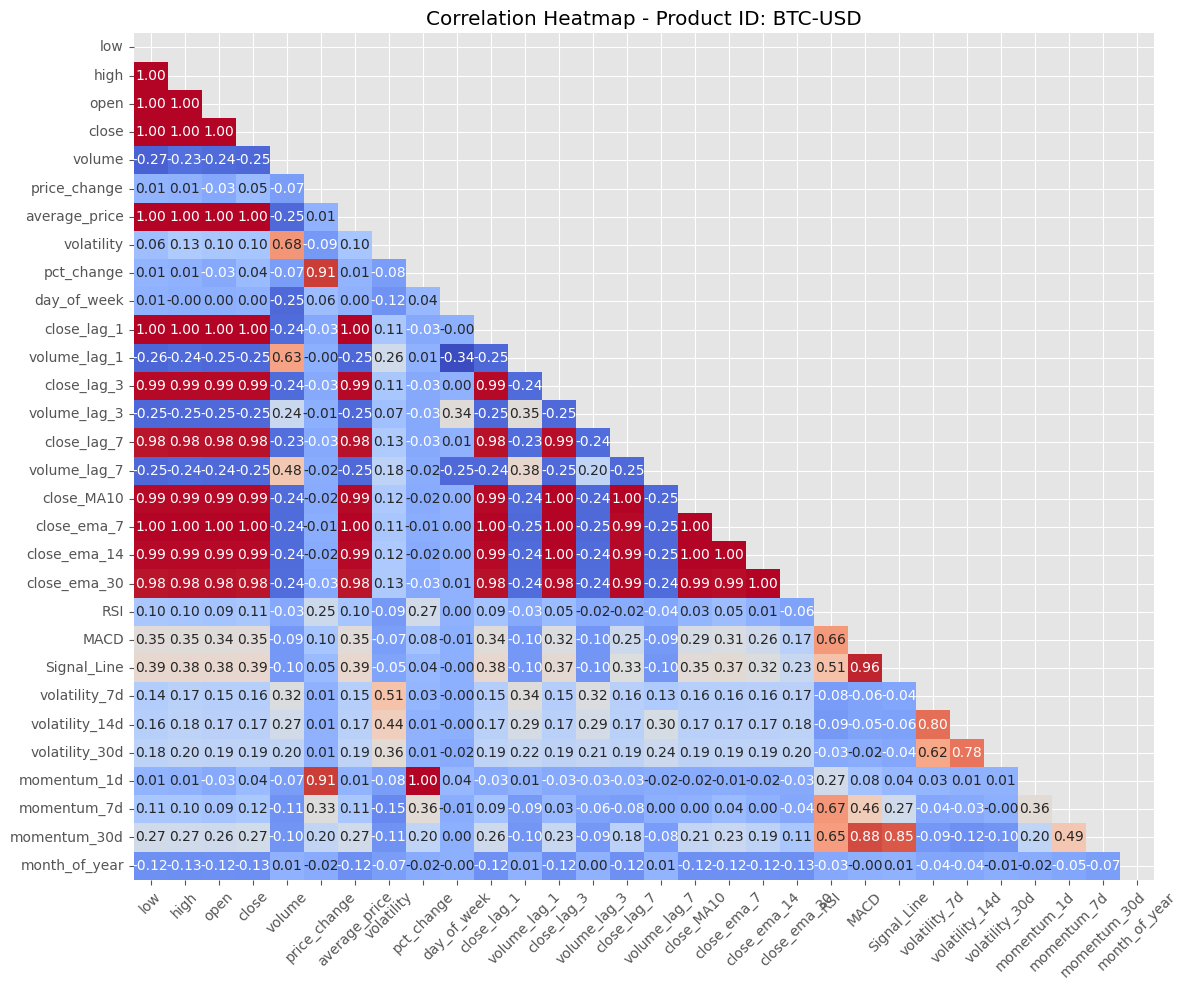

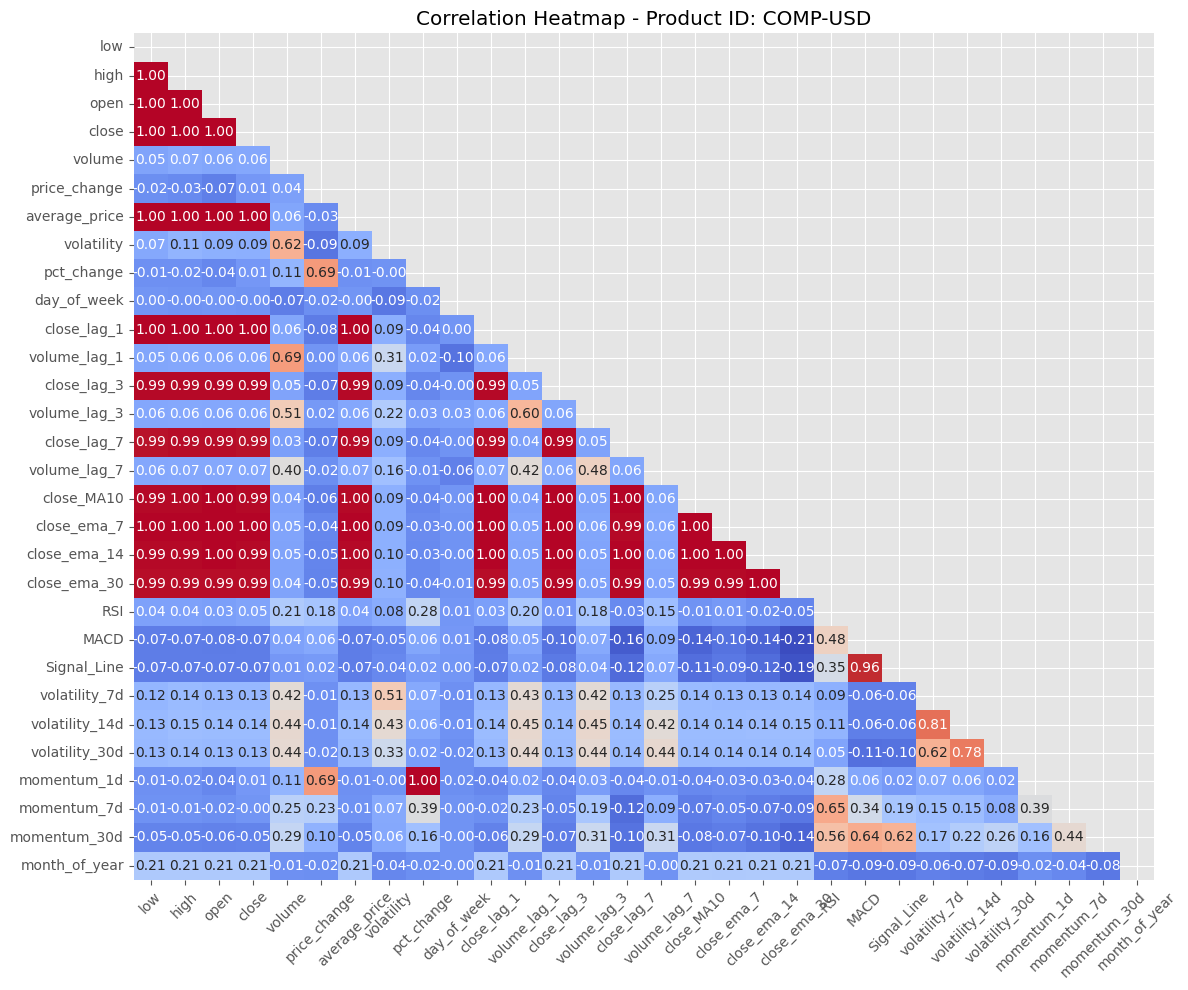

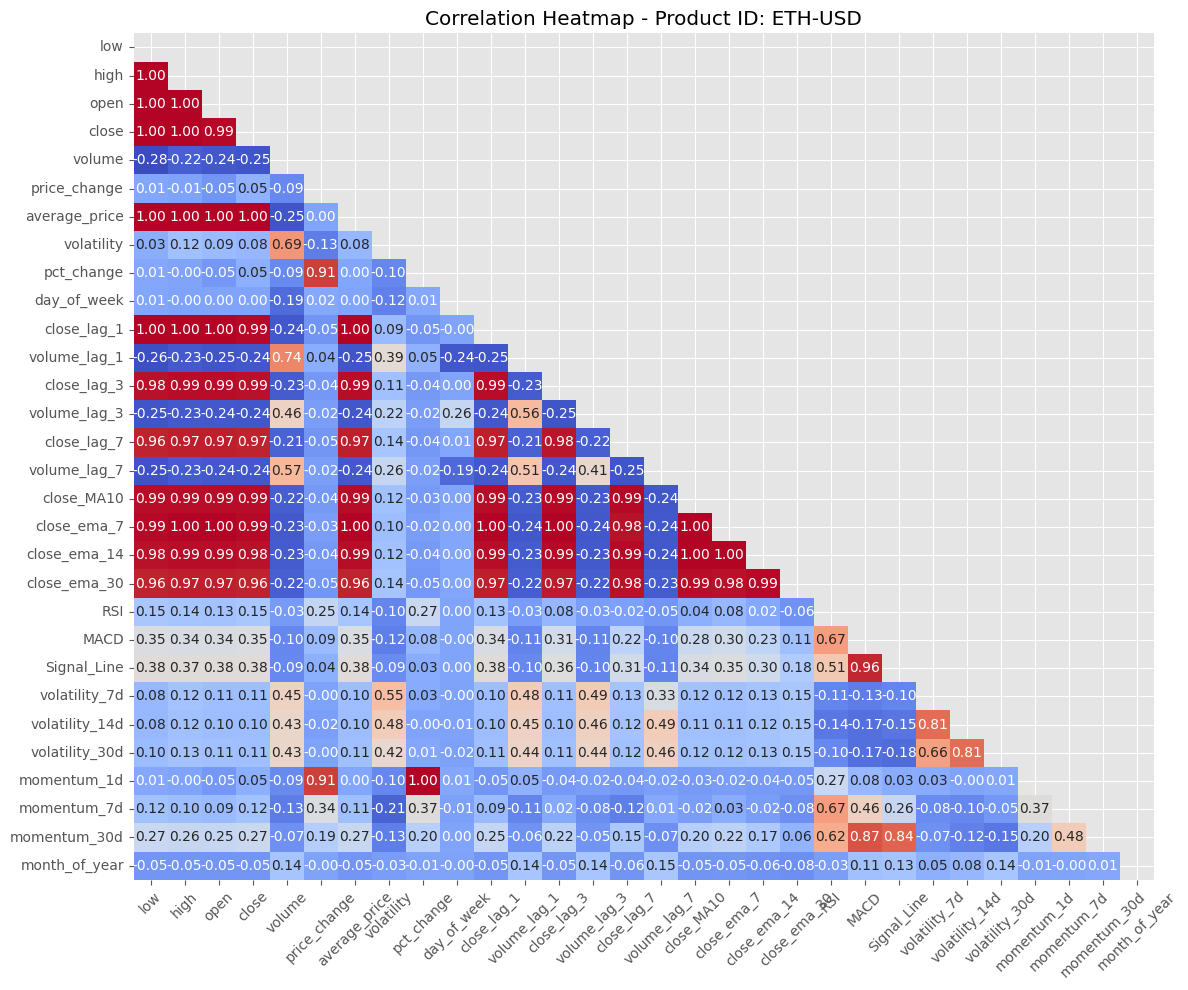

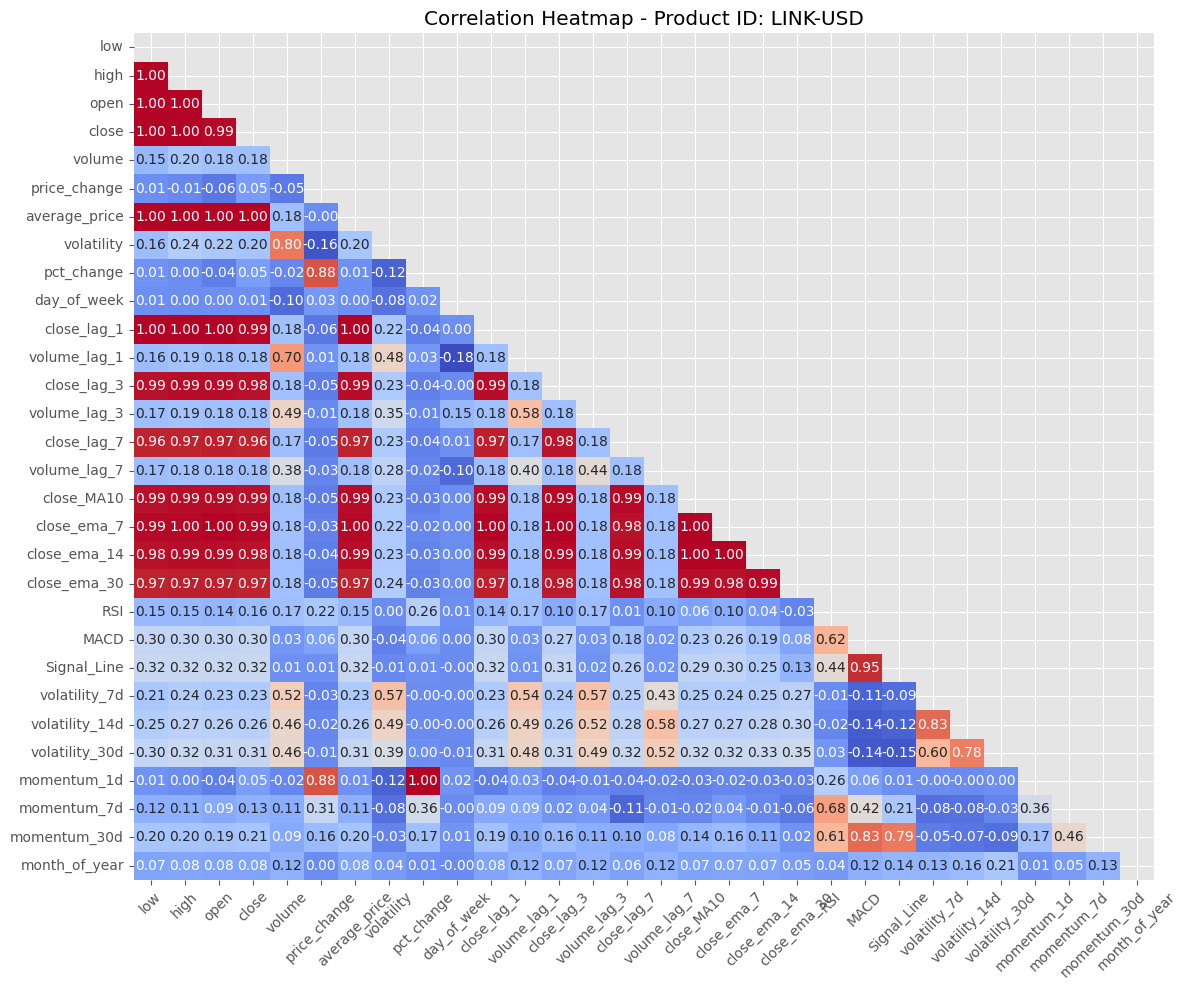

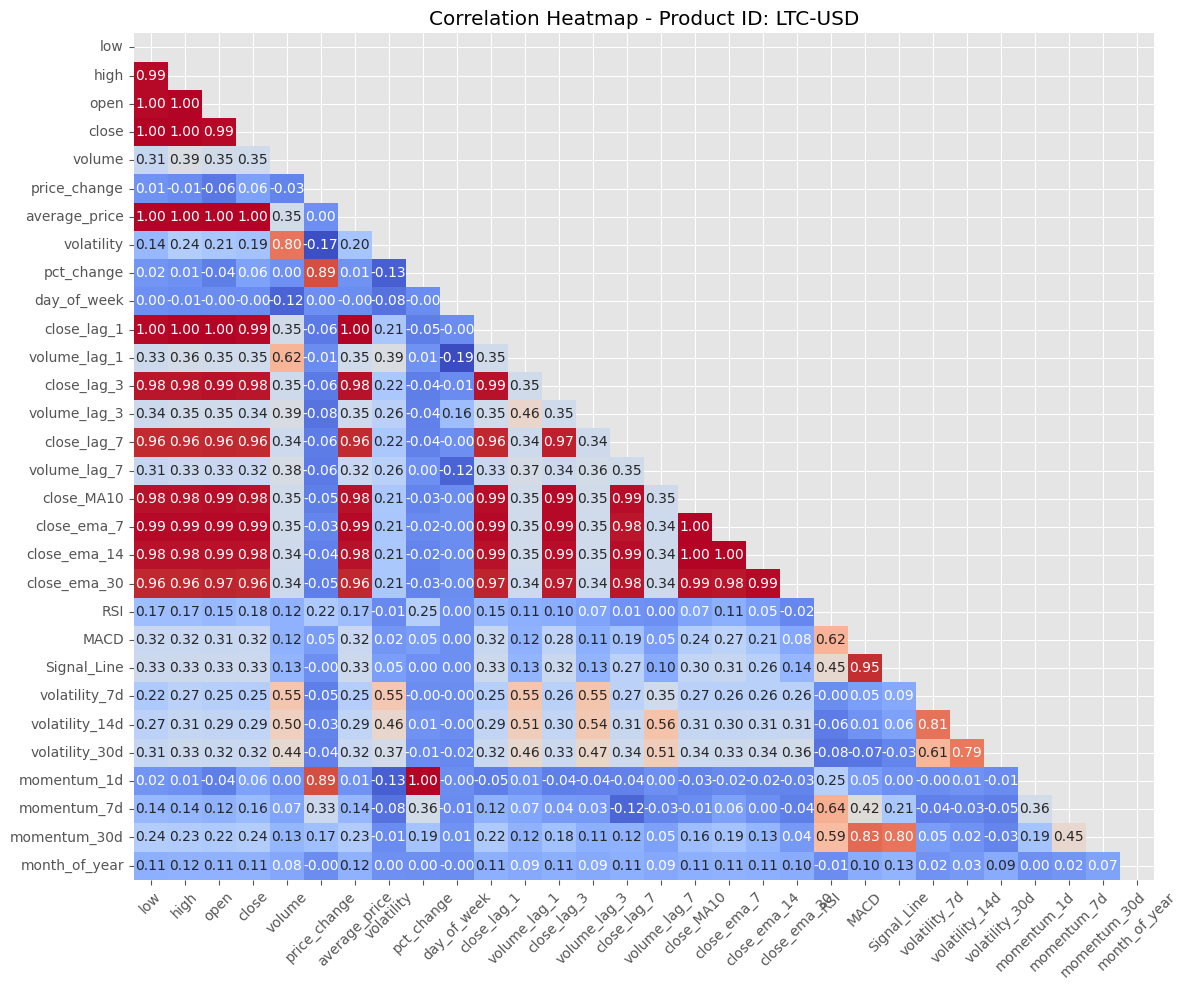

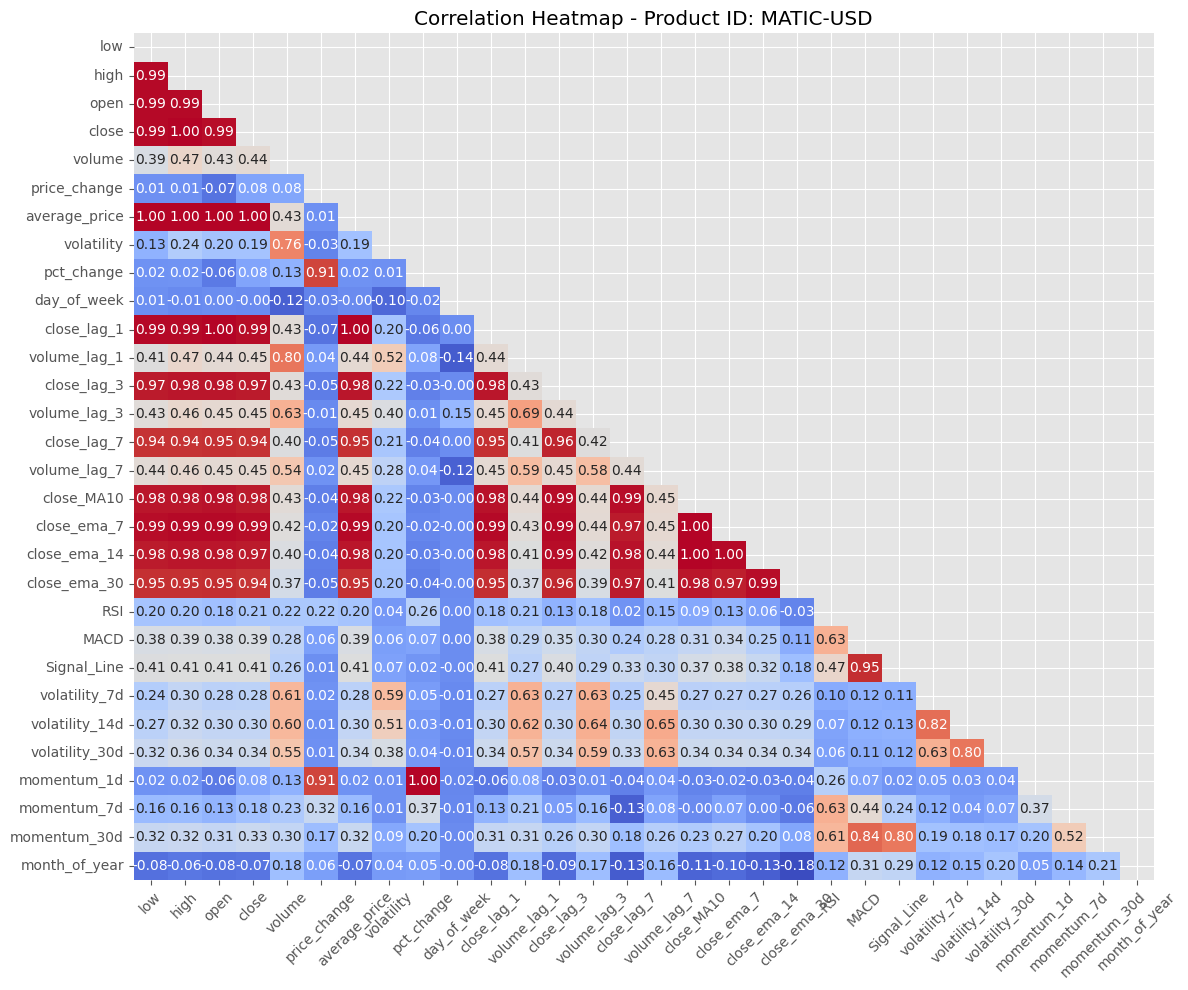

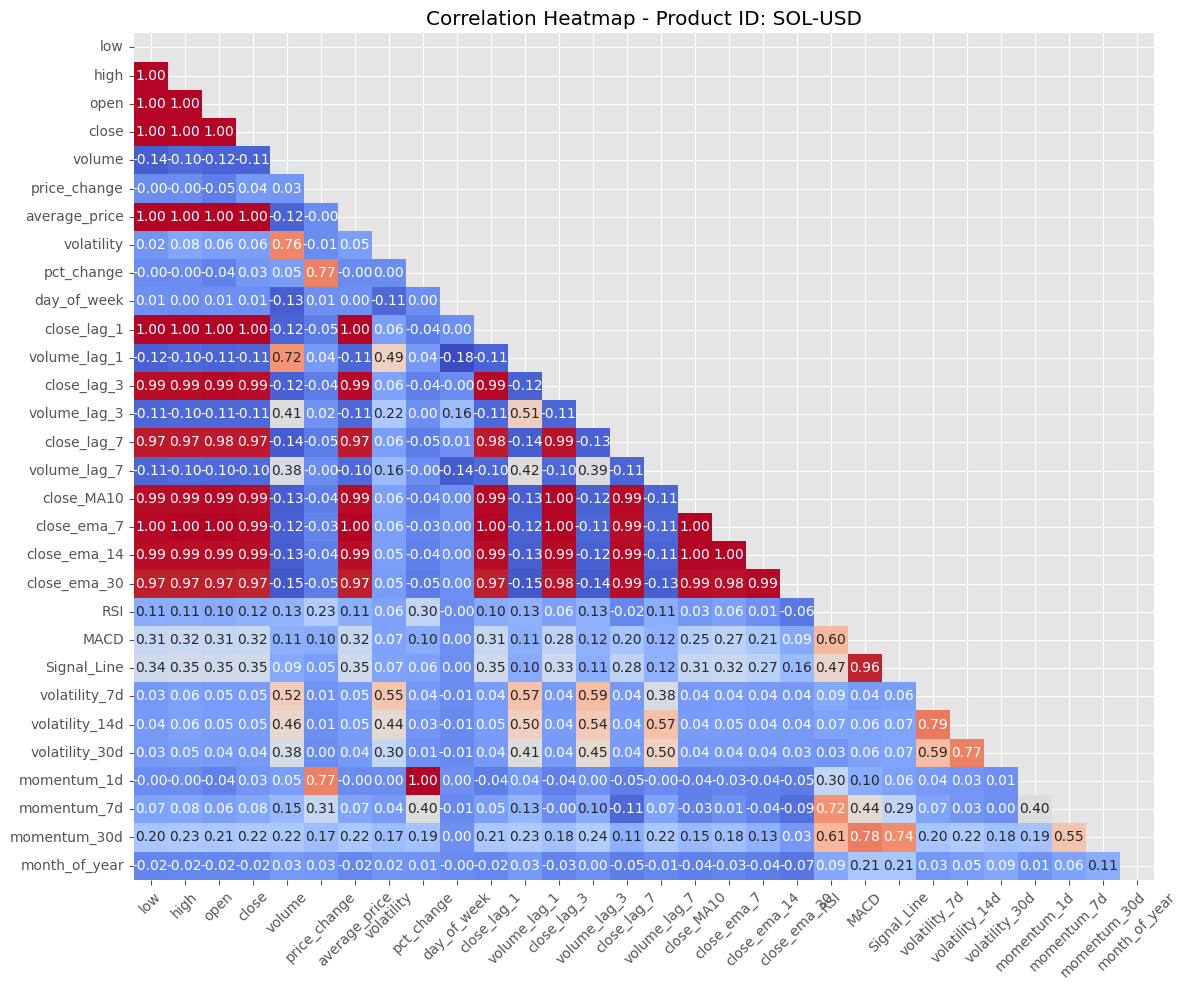

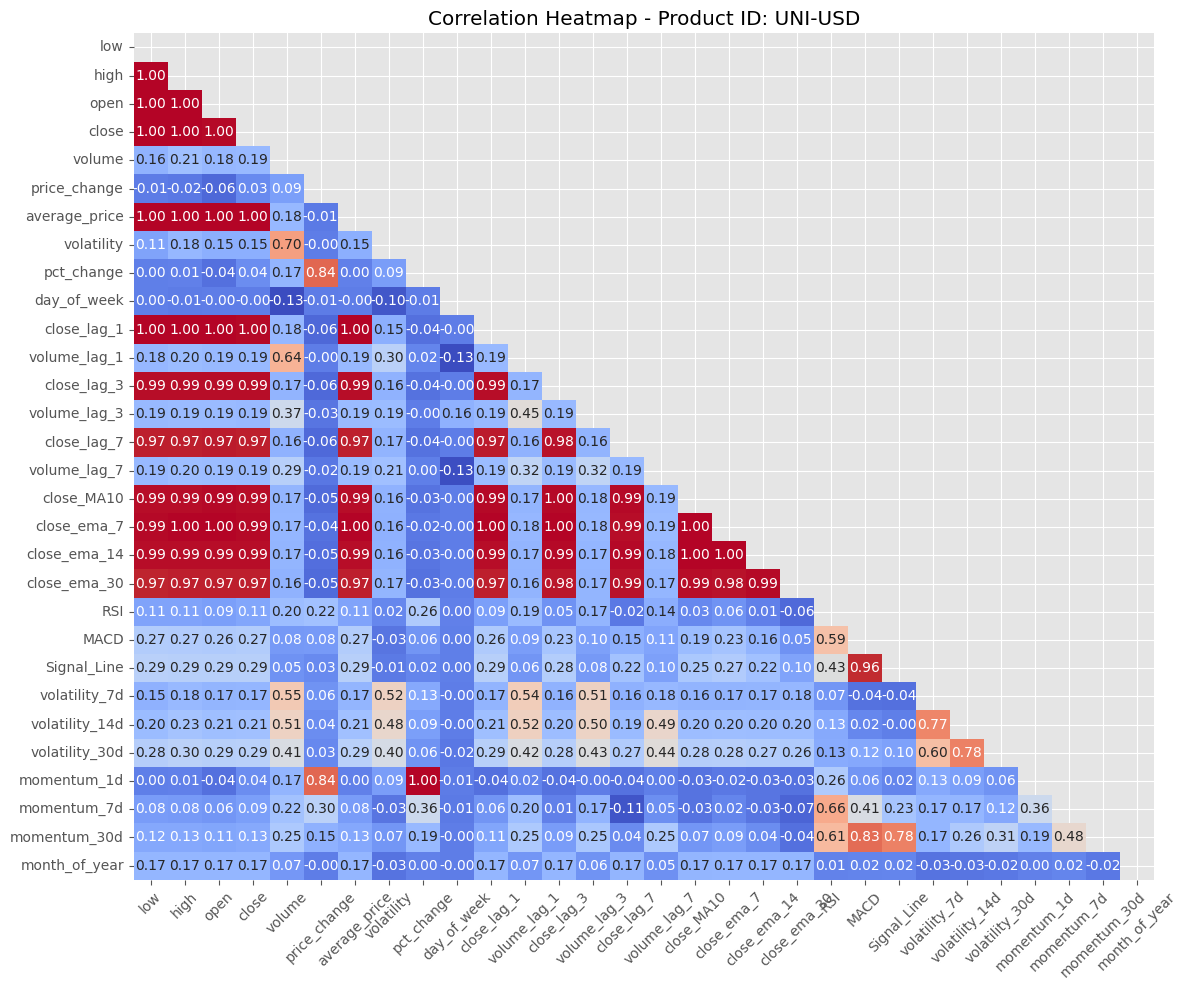

In [10]:
# Group by 'product_id'
grouped = df.groupby('product_id')

# Iterate over each group (up to 10 groups)
for i, (product_id, group) in enumerate(grouped):
    if i >= 10:
        break
    
    # Select numeric columns based on dtype
    numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
    
    # Compute correlations for the group
    corr = group[numeric_columns].corr()
    
    # Create a mask to display only the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Initialize a figure with larger size
    plt.figure(figsize=(12, 10))
    
    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar=False)
    
    # Customize plot
    plt.title(f'Correlation Heatmap - Product ID: {product_id}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Show plot
    plt.tight_layout()
    plt.show()


In [11]:
# Print all unique product IDs
unique_product_ids = df['product_id'].unique()
print("Unique Product IDs:")
for product_id in unique_product_ids:
    print(product_id)


Unique Product IDs:
ADA-USD
ETH-USD
LINK-USD
LTC-USD
MATIC-USD
SOL-USD
UNI-USD
COMP-USD
BTC-USD
AVAX-USD


In [12]:
# Columns to drop
columns_to_drop = [
    'average_price', 'close_lag_1', 'close_lag_3', 'close_lag_7',
    'close_MA10', 'close_ema_7', 'close_ema_14', 'close_ema_30'
]

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)


In [13]:
df.head(2)

product_id       time       low       high       open      close  \
0    ADA-USD 2021-07-20     1.025     1.1365     1.1228     1.0559   
1    ETH-USD 2021-07-20  1718.410  1840.7900  1818.4500  1786.4600   

         volume  price_change  volatility  pct_change  day_of_week day_name  \
0  9.878371e+07       -0.0669   10.878049         NaN            0   Monday   
1  2.789848e+05      -31.9900    7.121700         NaN            0   Monday   

   volume_lag_1  volume_lag_3  volume_lag_7  RSI  MACD  Signal_Line  \
0           NaN           NaN           NaN  NaN   0.0          0.0   
1           NaN           NaN           NaN  NaN   0.0          0.0   

   volatility_7d  volatility_14d  volatility_30d  momentum_1d  momentum_7d  \
0            NaN             NaN             NaN          NaN          NaN   
1            NaN             NaN             NaN          NaN          NaN   

   momentum_30d  month_of_year  
0           NaN              7  
1           NaN              7

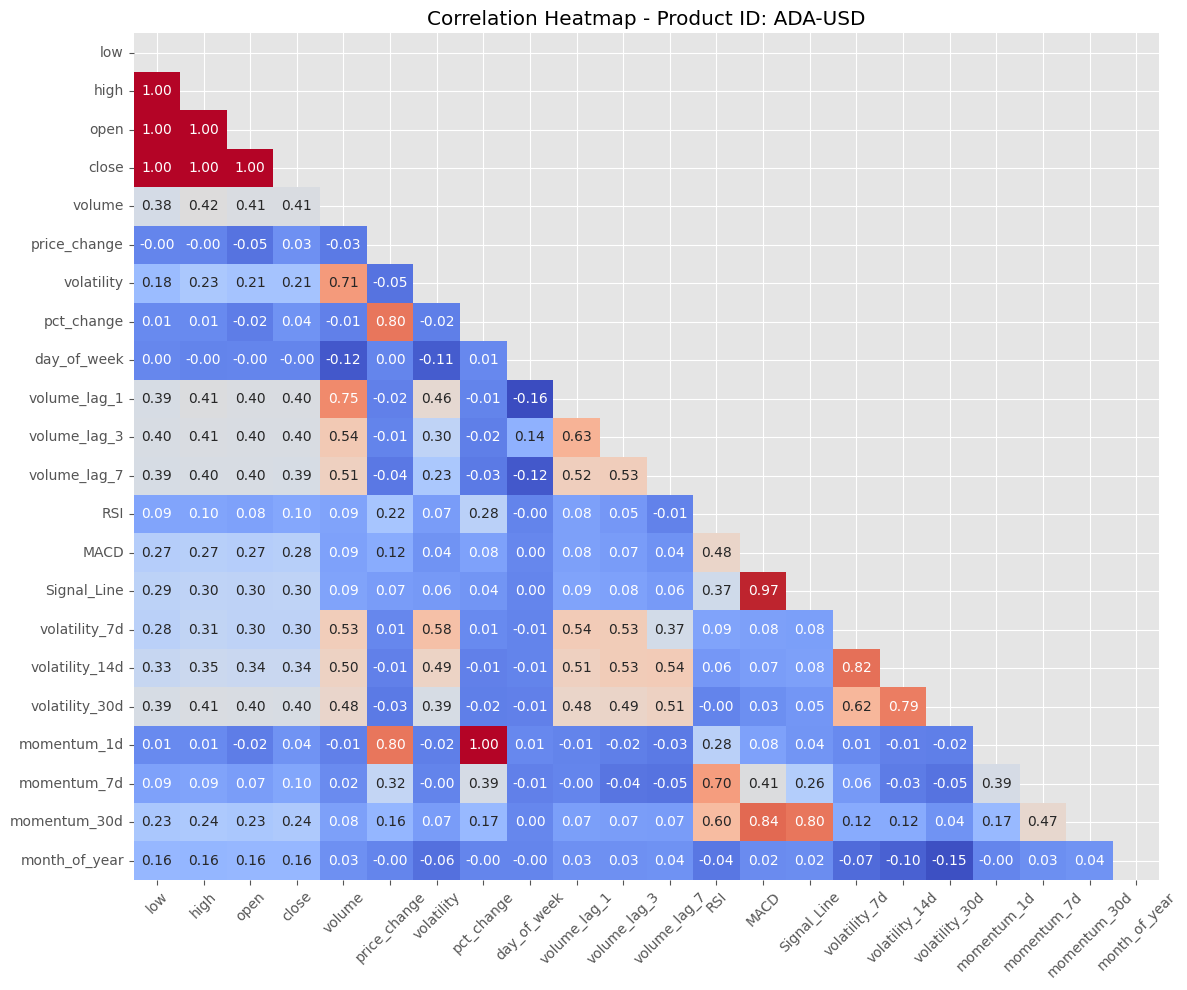

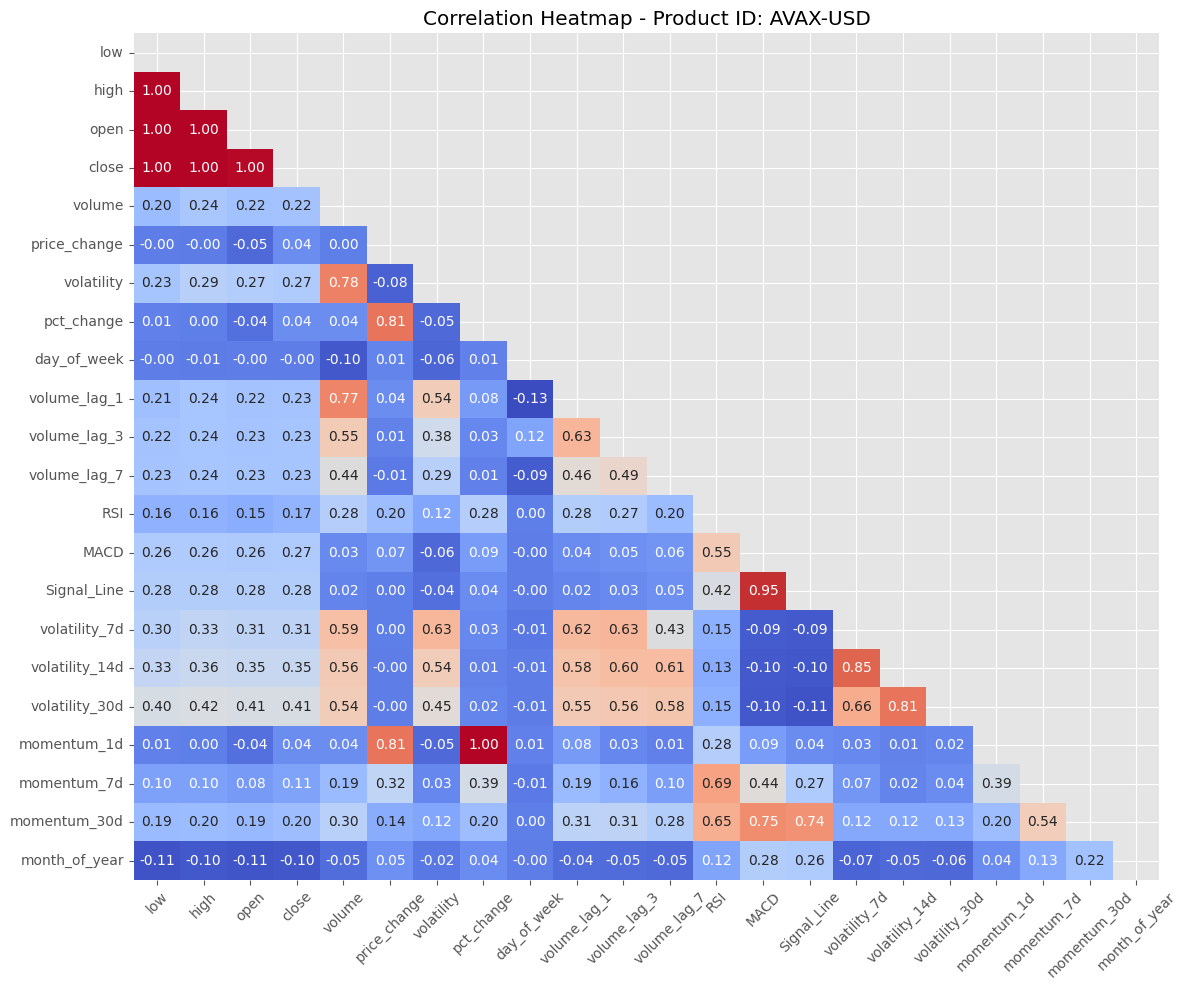

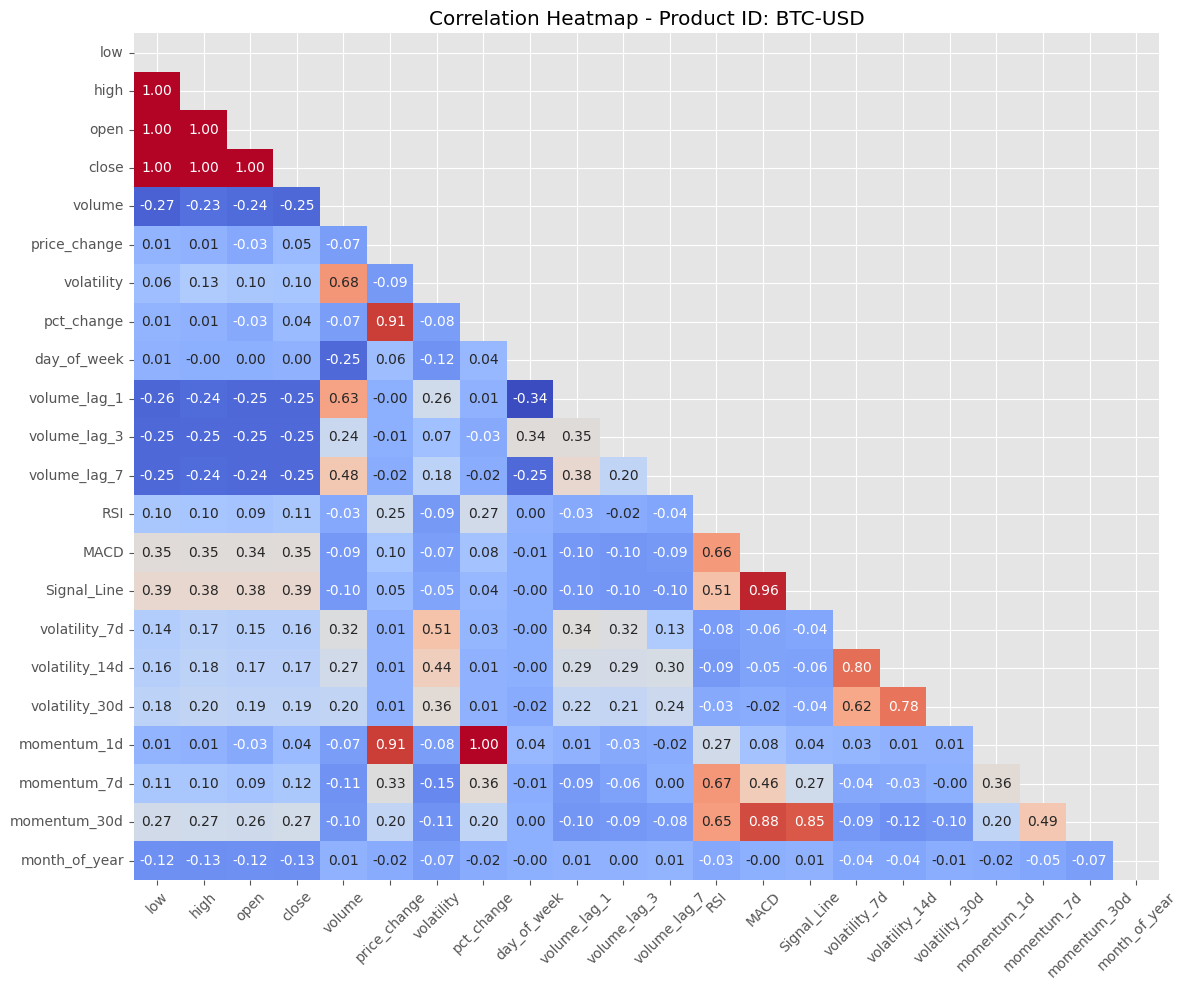

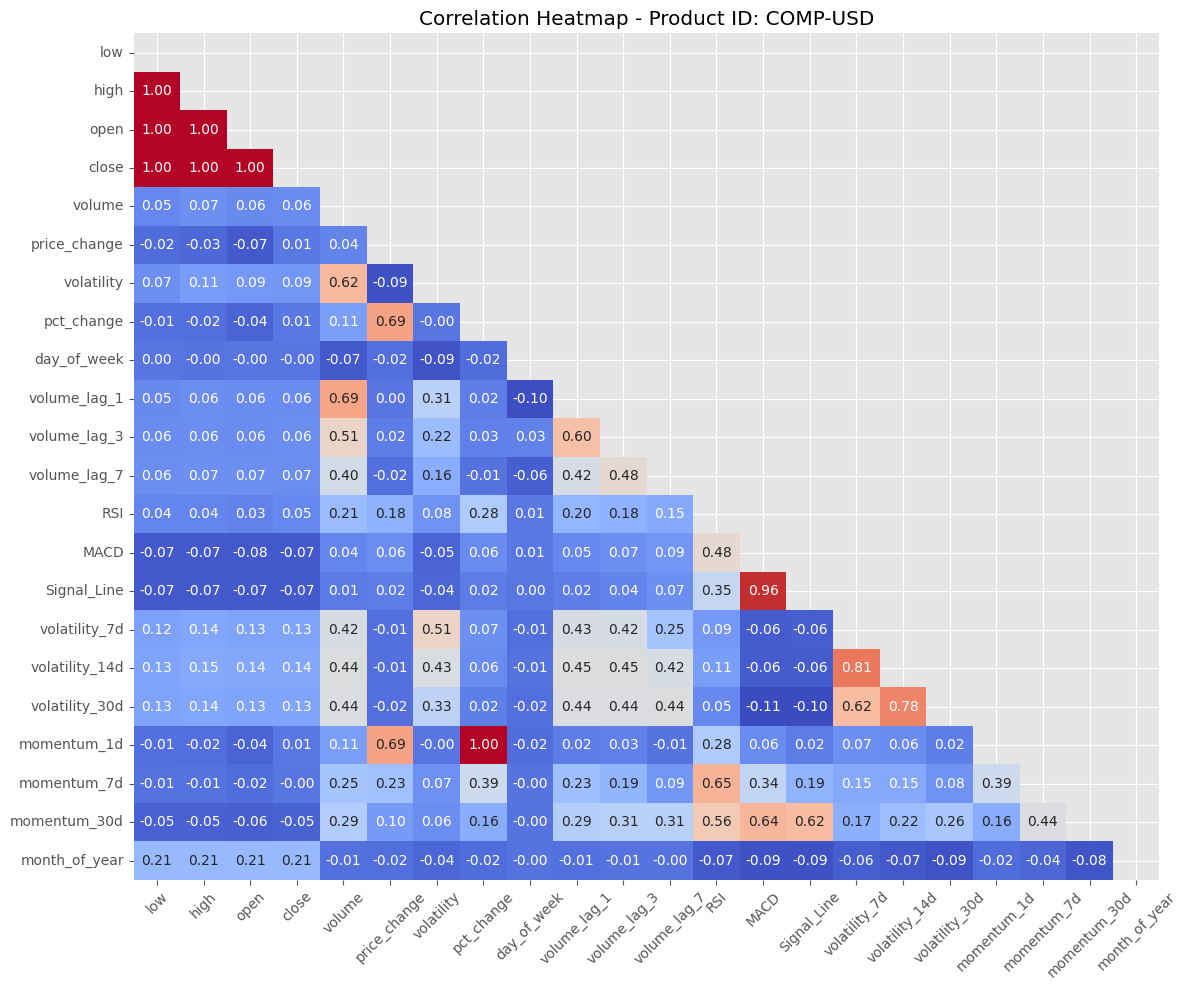

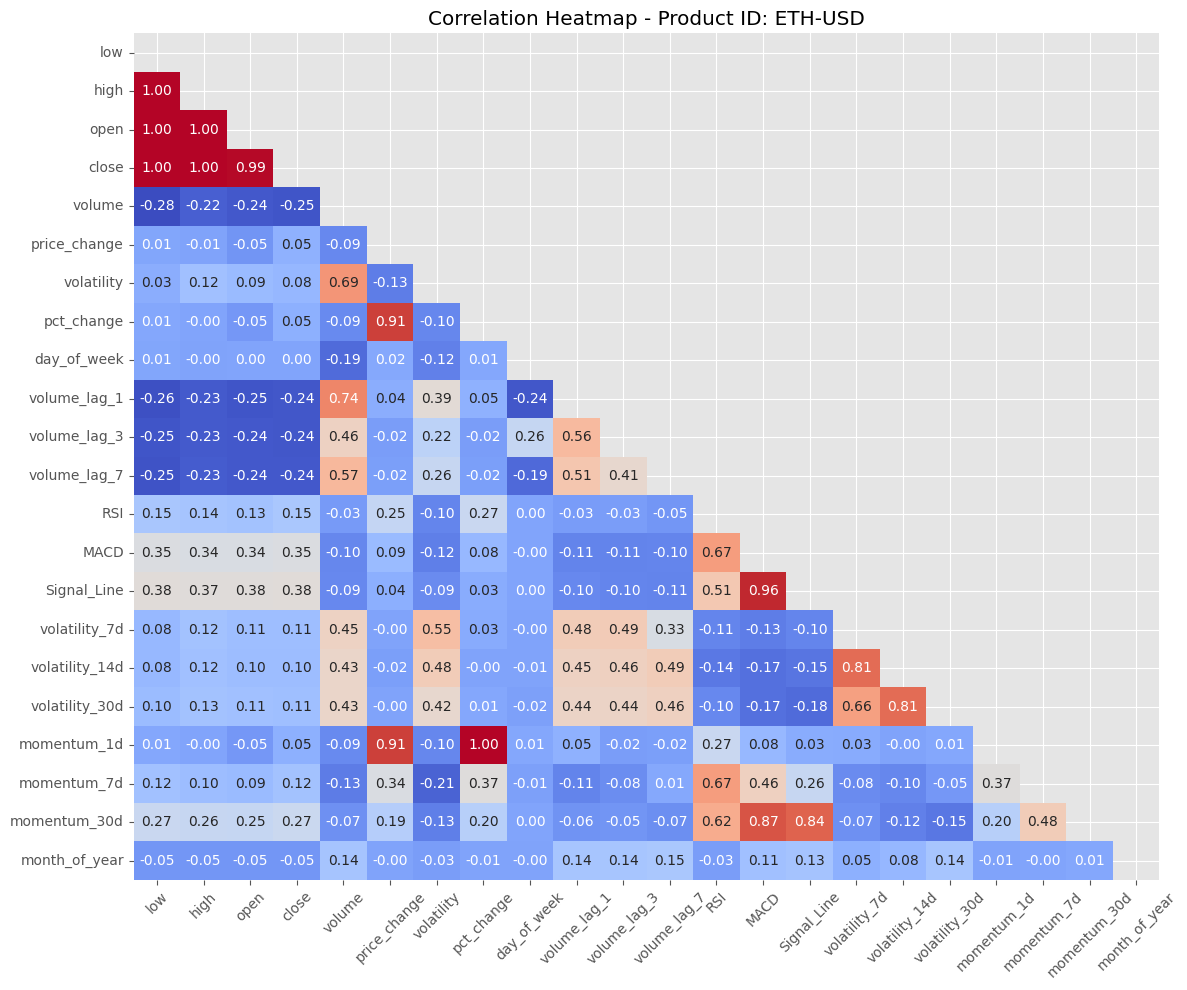

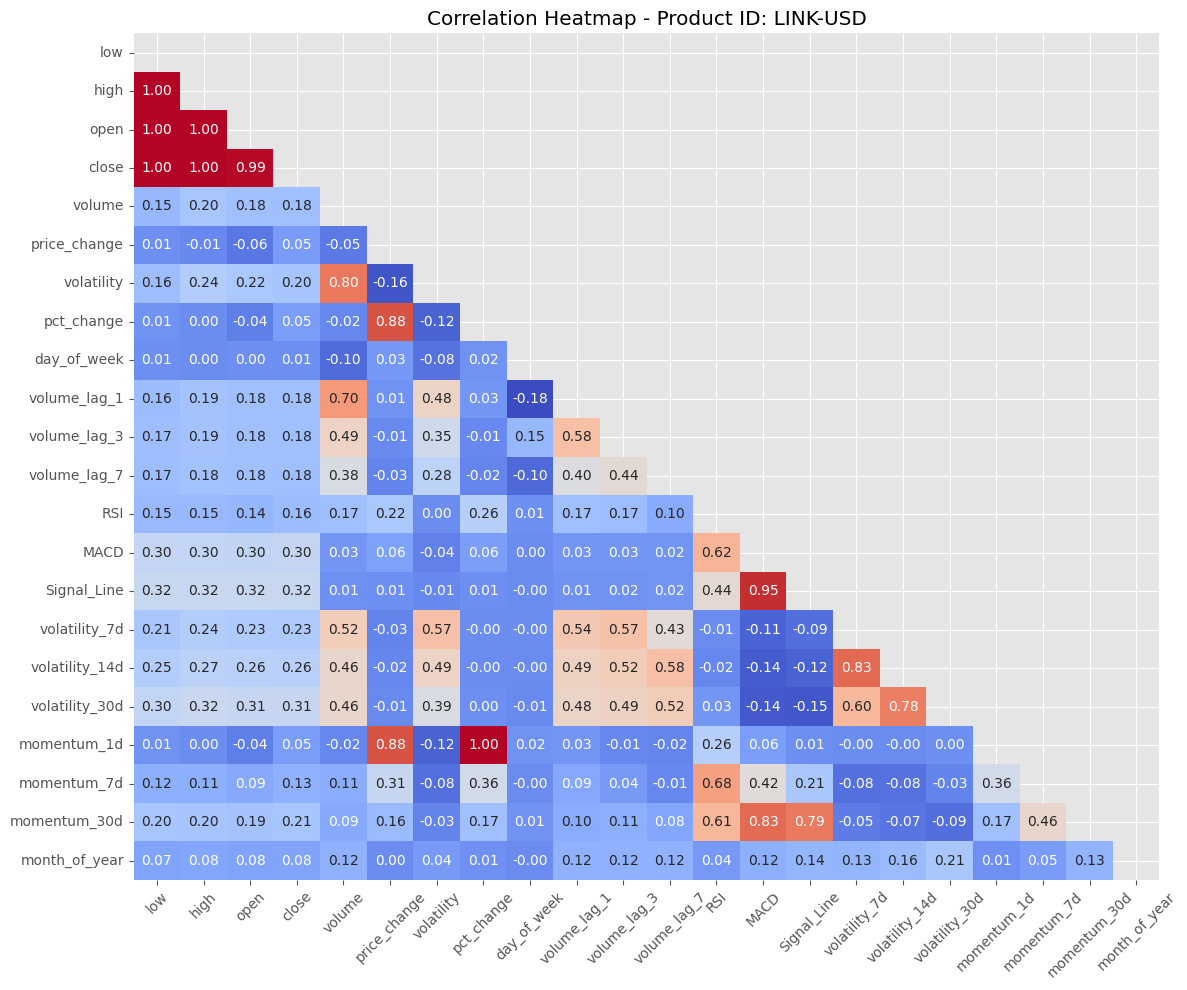

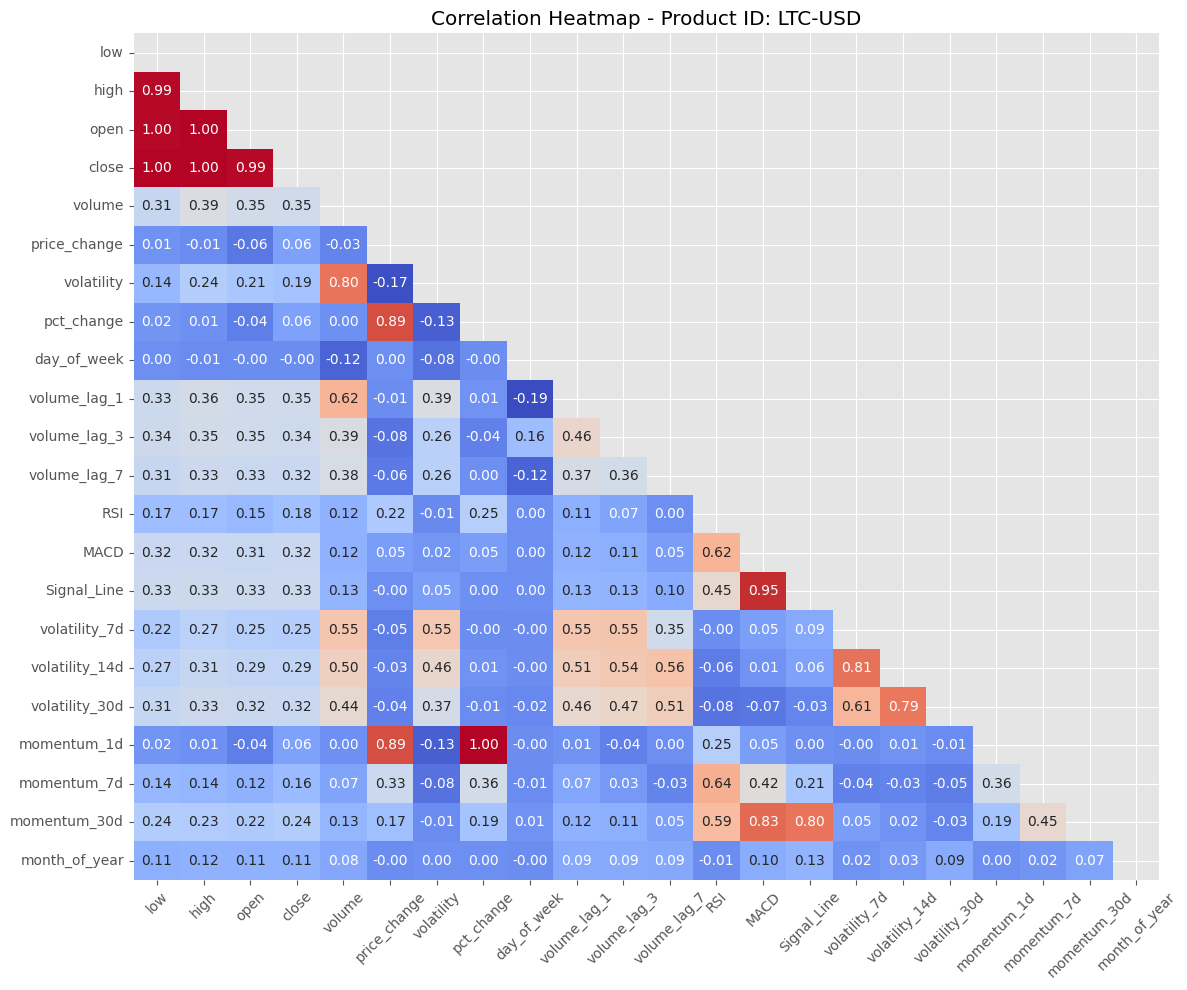

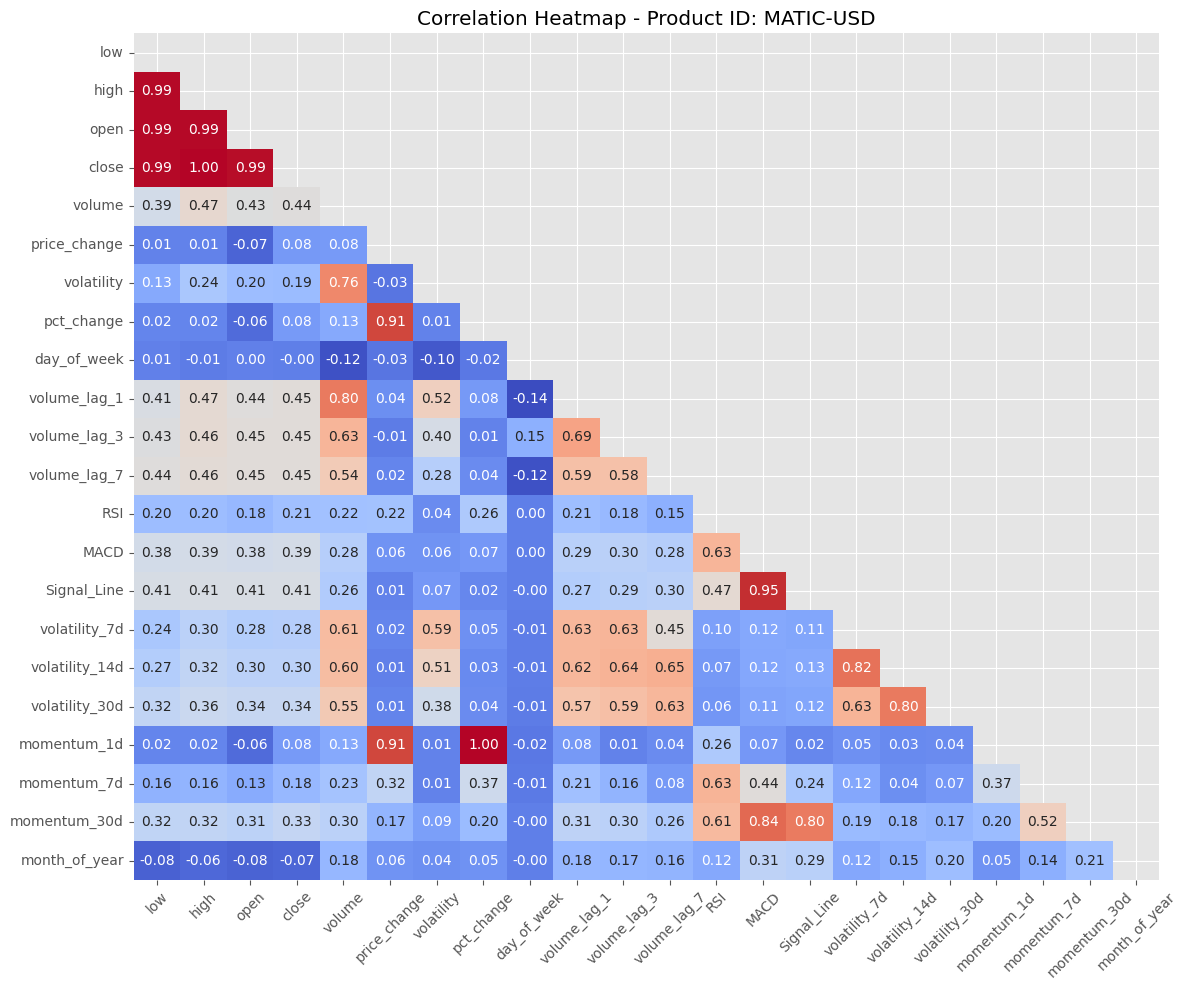

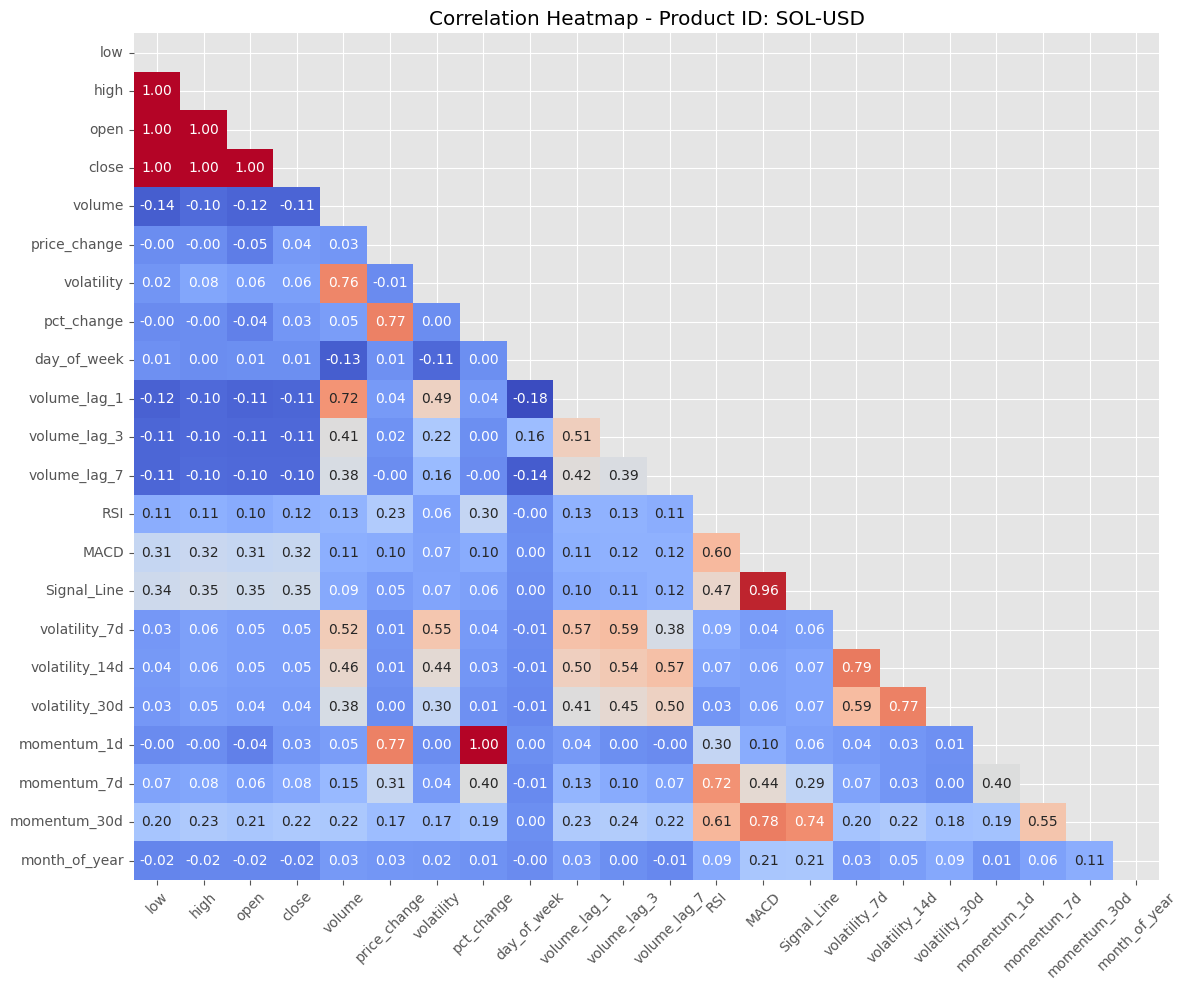

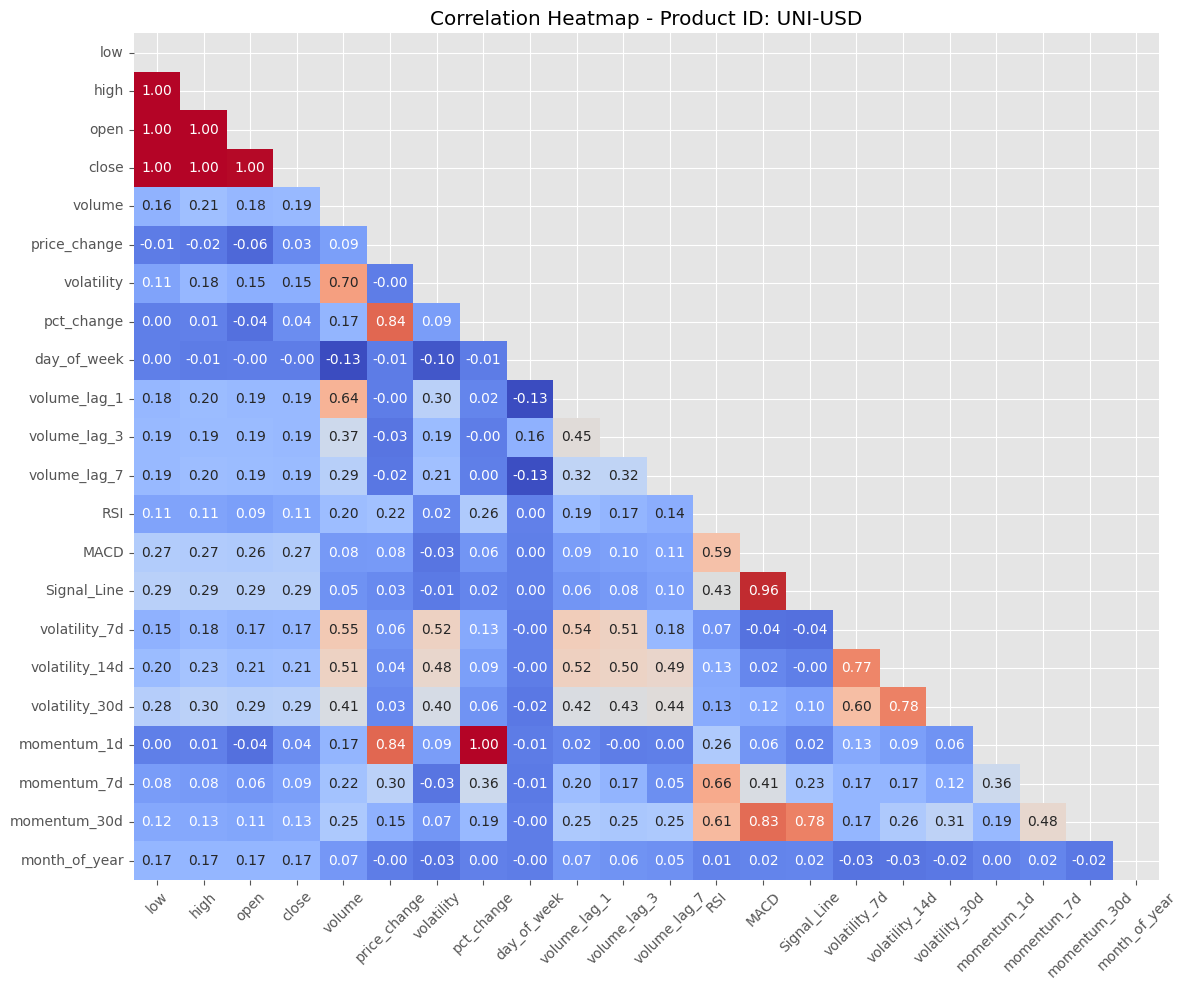

In [14]:
# Group by 'product_id'
grouped = df.groupby('product_id')

# Iterate over each group (up to 10 groups)
for i, (product_id, group) in enumerate(grouped):
    if i >= 10:
        break
    
    # Select numeric columns based on dtype
    numeric_columns = group.select_dtypes(include=['float64', 'int64']).columns
    
    # Compute correlations for the group
    corr = group[numeric_columns].corr()
    
    # Create a mask to display only the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    # Initialize a figure with larger size
    plt.figure(figsize=(12, 10))
    
    # Plot the heatmap
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', mask=mask, cbar=False)
    
    # Customize plot
    plt.title(f'Correlation Heatmap - Product ID: {product_id}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    # Show plot
    plt.tight_layout()
    plt.show()